In [ ]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib as matplotlib


def load_data():

    data = pd.read_csv('/content/drive/My Drive/data.csv', encoding='iso-8859-1')
    return data

tweet_df = load_data()


In [ ]:
tweet_df.head(10)

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,1,1,0,1,0,0,0,0,1,0,1,0
6,deklarasi pilkada 2018 aman dan anti hoax warg...,0,0,0,0,0,0,0,0,0,0,0,0
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,0,1,0,0,0,0,0,0,0,0,0,0
8,Nah admin belanja satu lagi port terbaik nak m...,0,0,0,0,0,0,0,0,0,0,0,0
9,USER Enak lg klo smbil ngewe',0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.DataFrame(tweet_df[['Tweet','Abusive','HS_Religion','HS_Race','HS_Physical','HS_Gender']])

In [ ]:
df

,Tweet,Abusive,HS_Religion,HS_Race,HS_Physical,HS_Gender
0,- disaat semua cowok berusaha melacak perhatia...,1,0,0,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,1,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,0,0
...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,0,0,1,0
13165,USER Kasur mana enak kunyuk',1,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0


In [ ]:
def remove_pattern(tweet, pattern):
   r = re.findall(pattern, tweet)
   for i in r :
      tweet = re.sub(i,'', tweet)
   return tweet
df['remove_user'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")

In [ ]:
df

,Tweet,Abusive,HS_Religion,HS_Race,HS_Physical,HS_Gender,remove_user
0,- disaat semua cowok berusaha melacak perhatia...,1,0,0,0,0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,1,0,0,0,0,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,0,0,USER USER Kaum cebong kapir udah keliatan dong...
...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,0,0,1,0,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,USER Kasur mana enak kunyuk',1,0,0,0,0,USER Kasur mana enak kunyuk'
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,USER USER USER USER Bom yang real mudah terdet...


In [ ]:
def remove(tweet):

    # Cleansing Process. Remove "Emoticon" and "Punctuation"
    tweet = tweet.lower() #lowering case
    tweet = re.sub(r'[^a-z]', ' ',tweet)
    tweet = re.sub('RT\s','', tweet) #replace RT tag
    tweet = re.sub('rt\s','', tweet) #replace RT tag
    tweet = re.sub('user\s','', tweet) #replace RT tag
    tweet = re.sub('\B@\w','', tweet) #replace username
    tweet = re.sub('(http|https):\/\/S+', '', tweet) #replace URL
    tweet = re.sub('#+', '', tweet) #replace # something
    tweet = re.sub(r'(.)\+1', r'\1\1', tweet) #replace word repetion (OOOOO to O)
    tweet = re.sub(r'[\?/\!]+(?=[\?.\!])', '', tweet)

    return tweet
df['text_clean'] = df['remove_user'].apply(lambda x: remove(x))

In [ ]:
df

,Tweet,Abusive,HS_Religion,HS_Race,HS_Physical,HS_Gender,remove_user,text_clean
0,- disaat semua cowok berusaha melacak perhatia...,1,0,0,0,0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,1,0,0,0,0,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gu...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi diliat...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,0,0,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...
...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,0,0,1,0,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal ngomong ndasmu congor lu yg sekat...
13165,USER Kasur mana enak kunyuk',1,0,0,0,0,USER Kasur mana enak kunyuk',kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu g n nlagi bosan huft xf x...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang terkub...


In [ ]:
df.drop_duplicates(subset = "text_clean", keep = 'first', inplace = True)

In [ ]:
df

,Tweet,Abusive,HS_Religion,HS_Race,HS_Physical,HS_Gender,remove_user,text_clean
0,- disaat semua cowok berusaha melacak perhatia...,1,0,0,0,0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,1,0,0,0,0,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gu...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,"41. Kadang aku berfikir, kenapa aku tetap perc...",kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi diliat...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,0,0,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...
...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,0,0,1,0,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal ngomong ndasmu congor lu yg sekat...
13165,USER Kasur mana enak kunyuk',1,0,0,0,0,USER Kasur mana enak kunyuk',kasur mana enak kunyuk
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu g n nlagi bosan huft xf x...
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang terkub...


In [ ]:
df.drop(df.columns[[0,6]], axis = 1, inplace = True)

In [ ]:
df

,Abusive,HS_Religion,HS_Race,HS_Physical,HS_Gender,text_clean
0,1,0,0,0,0,disaat semua cowok berusaha melacak perhatia...
1,1,0,0,0,0,siapa yang telat ngasih tau elu edan sarap gu...
2,0,0,0,0,0,kadang aku berfikir kenapa aku tetap perc...
3,0,0,0,0,0,aku itu aku n nku tau matamu sipit tapi diliat...
4,1,1,0,0,0,kaum cebong kapir udah keliatan dongoknya dari...
...,...,...,...,...,...,...
13164,1,0,0,1,0,jangan asal ngomong ndasmu congor lu yg sekat...
13165,1,0,0,0,0,kasur mana enak kunyuk
13166,0,0,0,0,0,hati hati bisu g n nlagi bosan huft xf x...
13167,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...


In [ ]:
df.describe()

,Abusive,HS_Religion,HS_Race,HS_Physical,HS_Gender
count,12998.000000,12998.000000,12998.000000,12998.000000,12998.000000
mean,0.383444,0.060317,0.043237,0.024542,0.023311
std,0.486244,0.238082,0.203399,0.154731,0.150896
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.sum()

Abusive                                                     4984
HS_Religion                                                  784
HS_Race                                                      562
HS_Physical                                                  319
HS_Gender                                                    303
text_clean       disaat semua cowok berusaha melacak perhatia...
dtype: object

In [ ]:
division = ['Sentiment of Abusive','Sentiment of Religion','Sentiment of Race','Sentiment of Physical','Sentiment of Gender','Positif Sentiment']
division_percentage_mark = [4984,784,562,319,303,6046]
Explode =[0,0,0.1,0,0,0]

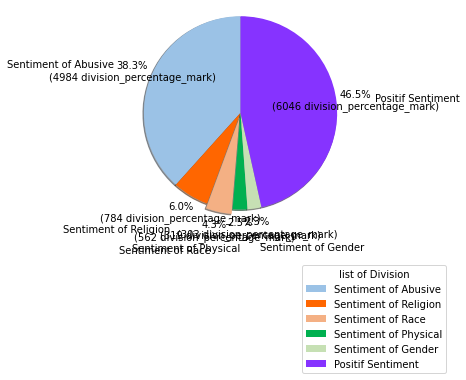

In [ ]:
plt.pie(division_percentage_mark, explode=[0,0,0.1,0,0,0], labels = division,pctdistance = 1.2,
        labeldistance = 1.4,
        autopct=lambda x: f'{x:.1f}%\n({(x/100)*sum(division_percentage_mark):.0f} division_percentage_mark)',
        textprops={"family":"Arial","size": 10},
        radius = 2,
        colors = ["#9BC2E6", "#FF6600", "#F4B084", "#00B050", "#C6E0B4", "#8633FF", "#CCCCFF"],
         shadow=True,startangle=90)
plt.axis('equal')
plt.legend(title='list of Division',bbox_to_anchor=(1,0), loc="upper right",
                          bbox_transform=plt.gcf().transFigure)
plt.show()

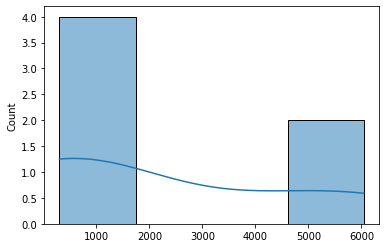

In [ ]:
sns.histplot(data=division_percentage_mark, kde=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12931 entries, 0 to 13168
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Abusive      12931 non-null  int64 
 1   HS_Religion  12931 non-null  int64 
 2   HS_Race      12931 non-null  int64 
 3   HS_Physical  12931 non-null  int64 
 4   HS_Gender    12931 non-null  int64 
 5   text_clean   12931 non-null  object
dtypes: int64(5), object(1)
memory usage: 707.2+ KB


In [ ]:
df

,Abusive,HS_Religion,HS_Race,HS_Physical,HS_Gender,text_clean
0,1,0,0,0,0,disaat semua cowok berusaha melacak perhatia...
1,1,0,0,0,0,siapa yang telat ngasih tau elu edan sarap gu...
2,0,0,0,0,0,kadang aku berfikir kenapa aku tetap perc...
3,0,0,0,0,0,aku itu aku n nku tau matamu sipit tapi diliat...
4,1,1,0,0,0,kaum cebong kapir udah keliatan dongoknya dari...
...,...,...,...,...,...,...
13164,1,0,0,1,0,jangan asal ngomong ndasmu congor lu yg sekat...
13165,1,0,0,0,0,kasur mana enak kunyuk
13166,0,0,0,0,0,hati hati bisu g n nlagi bosan huft xf x...
13167,0,0,0,0,0,bom yang real mudah terdeteksi bom yang terkub...
